K Means Clustering lgorithms Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #generate isoptopic blobs of clustering
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)
# We never take y in clustering aalgo, but this lib gives y so we will ignore it

In [6]:
X.shape

(1000, 2)

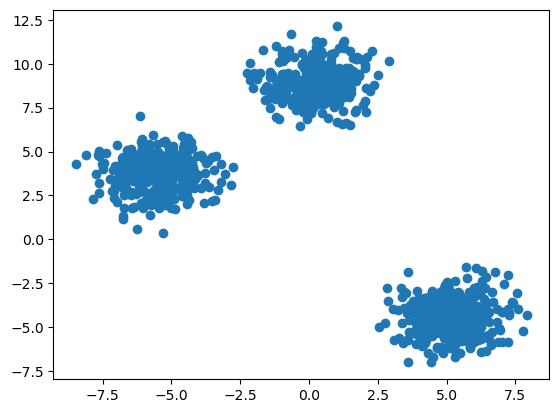

In [9]:
plt.scatter(X[:,0],X[:,1])

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [14]:
from sklearn.cluster import KMeans

In [15]:
## Manual Process
##Elbow Method to selcet the K value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [16]:
wcss

[34393.593624481844,
 8074.749054967103,
 1277.8127468986463,
 1121.6448167274157,
 965.7221985816967,
 813.7343262737518,
 722.4315782911356,
 633.9258435588762,
 551.4590748802137,
 509.4068414733385]

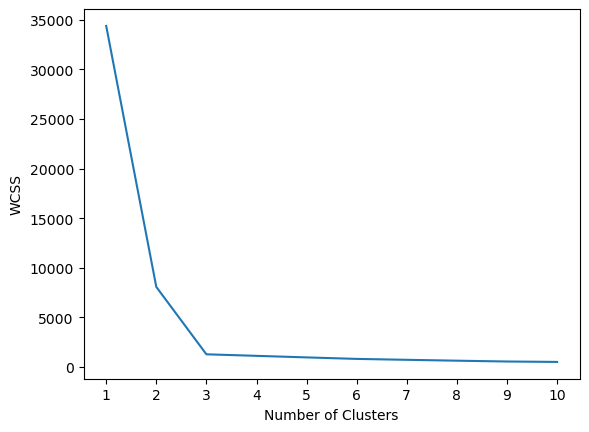

In [17]:
#Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [19]:
y_labels = kmeans.fit_predict(X_train)

C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


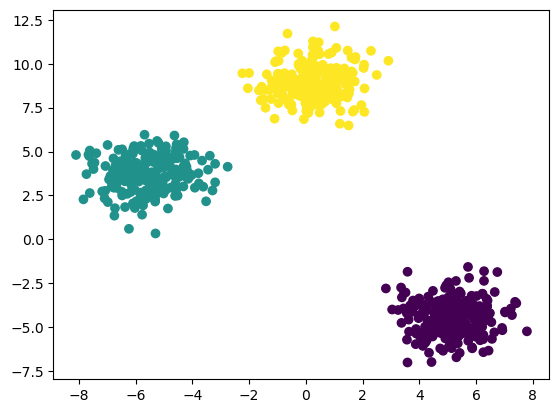

In [20]:
plt.scatter(X_train[:,0],X_train[:,1], c = y_labels)

In [21]:
y_test_label = kmeans.predict(X_test)

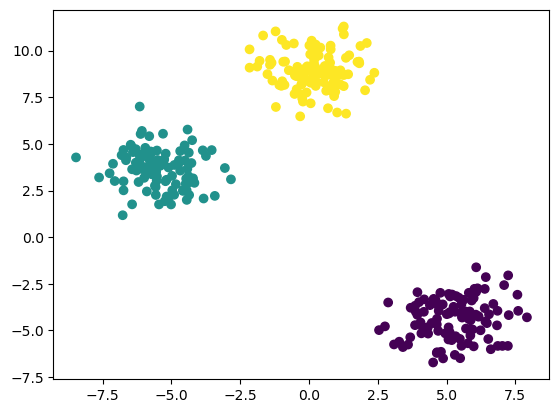

In [24]:
plt.scatter(X_test[:,0],X_test[:,1], c = y_test_label)

In [29]:
### knee locater
#!pip install kneed
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction = 'decreasing')
kl.elbow

3

In [34]:
from sklearn.metrics import silhouette_score

In [38]:
## Performance metrics
##Silhoutee Score
Silhouette_Coeff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    Silhouette_Coeff.append(score)

C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BharviC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [39]:
Silhouette_Coeff

[0.7258512039348652,
 0.8088030466285365,
 0.6335819920708321,
 0.4707950453376347,
 0.3382587253898789,
 0.34616134557942324,
 0.3440505278009511,
 0.3496540962013643,
 0.3506920517147872]

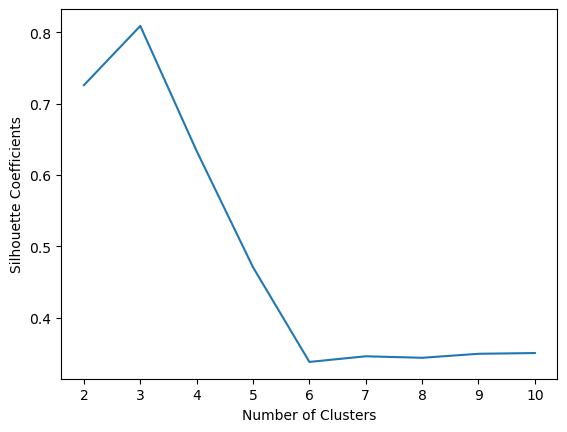

In [41]:
plt.plot(range(2,11),Silhouette_Coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

The Silhouette score for K = 3 is the highest, hence it the best clusters we can get are 3